# Лабораторна робота №3 з Видобування даних
## Очищення даних
### Мета роботи: навчитися базовому фунукціоналу pandas для обробки та підготовки даних до моделювання та використання

###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame 

In [1]:
### Code starts from here ###
import pandas as pd

url = 'https://raw.githubusercontent.com/AndrewVoisovych/DataMiningLabs/master/understat.com.csv'
data = pd.read_csv(url)

data[(data['сhampionship']== 'EPL')].head(10)



,сhampionship,season,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
100,EPL,2014,1,Chelsea,38,26,9,3,73,32,...,31.524344,-0.475656,29.240835,35.499567,10.942027,13.419520,407,171,75.3172,-11.6828
101,EPL,2014,2,Manchester City,38,24,7,7,83,38,...,40.499403,2.499403,37.454762,32.154329,7.982490,15.076979,575,144,73.0982,-5.9018
102,EPL,2014,3,Arsenal,38,22,9,7,71,36,...,35.718825,-0.281175,33.435352,31.039052,8.660596,13.254169,398,171,75.1740,0.1740
103,EPL,2014,4,Manchester United,38,20,10,8,62,37,...,39.842347,2.842347,36.797702,13.603311,7.648715,15.521977,267,194,63.0327,-6.9673
104,EPL,2014,5,Tottenham,38,19,7,12,58,53,...,57.044148,4.044148,51.598938,-3.171924,8.000237,11.300694,210,232,48.9361,-15.0639
105,EPL,2014,6,Liverpool,38,18,8,12,52,48,...,38.249721,-9.750279,35.829400,11.300810,9.913851,12.121981,306,201,61.1673,-0.8327
106,EPL,2014,7,Southampton,38,18,6,14,54,33,...,39.113520,6.113520,37.591178,15.090994,9.259540,14.879479,270,183,62.8166,2.8166
107,EPL,2014,8,Swansea,38,16,8,14,46,49,...,55.942970,6.942970,54.420634,-15.041734,12.826741,11.455201,156,310,43.3167,-12.6833
108,EPL,2014,9,Stoke,38,15,9,14,48,45,...,47.030662,2.030662,43.224882,0.752202,10.405753,10.601440,195,239,51.9715,-2.0285
109,EPL,2014,10,Crystal Palace,38,13,9,16,47,51,...,45.484365,-5.515635,40.820304,-0.767395,11.577051,6.582148,180,258,50.5570,2.5570


###2.Видаліть ті колонки які вам не потрібні для подальшого аналізу, залишивши ті що ви вибрали в рамках 2 лабораторної роботи ( df.drop )




In [12]:

data = data.drop(data[data['сhampionship'] == 'RFPL'].index)

Для мого аналізу не потрібно видаляти колонки, тому що велика кількість колонок дають великий простір для аналізу та різноманітних досліджень даних.
Проте я видалив рядки пов’язані із Російською лігою (по причині того що дані дуже занижені, через те що це зовсім не топ чемпіонат, а особистий вибір того хто формував датасет)

###3.Скільки % записів у ваших колонках є пусті / null ? Вивдеіть для кожного стовпця відсоток таких записів (df.isnull) Якщо таких записів більше 50% - вартує видалити такий стовпець чи ні ? Якщо так - видаліть.
 

In [13]:
from functools import reduce 
nonNull = data.count()

print("Percent of empty records %s%%" % (100 - nonNull.sum() / reduce(lambda x, y: x * y, data.shape) * 100))

Percent of empty records 0.0%


У моїх колонках немає порожніх значень.


###4.Перевірте свої записи на дублікати . Якщо такі є - це помилкові записи чи подібні але окремі ? (df.duplicated) Чи є у вас колонки з різними назвами але які містять одинакову інформацію ?


In [14]:
duplicates = data.duplicated()
print("Number of duplicates: %s" % data[duplicates].shape[0])

Number of duplicates: 0


Дублікатів в наборі немає.



###5.Чи є у вас помилки у назвах колонок - якщо так виправте перейменувавши їх



Всі назви колонок є названі без помилок.

###6.Перегляньти значення категорій якщо стовпці з такими даними є. Чи вони справді унікальні чи є помилкові дублікати ? ( приклади: model i Model , NA i NotAssesed, New-York i New York )




In [15]:
import numpy

categorical = data[data.columns.difference(data._get_numeric_data().columns)]

for colName in categorical.columns:
    print("%s: %s" % (colName, ", ".join(categorical[colName].unique())))

team: Barcelona, Real Madrid, Atletico Madrid, Valencia, Sevilla, Villarreal, Athletic Club, Celta Vigo, Malaga, Rayo Vallecano, Espanyol, Real Sociedad, Elche, Getafe, Levante, Deportivo La Coruna, Granada, Eibar, Almeria, Cordoba, Real Betis, Las Palmas, Sporting Gijon, Alaves, Leganes, Osasuna, Girona, Real Valladolid, SD Huesca, Chelsea, Manchester City, Arsenal, Manchester United, Tottenham, Liverpool, Southampton, Swansea, Stoke, Crystal Palace, West Ham, Everton, West Bromwich Albion, Leicester, Newcastle United, Aston Villa, Sunderland, Hull, Burnley, Queens Park Rangers, Watford, Bournemouth, Norwich, Middlesbrough, Brighton, Huddersfield, Wolverhampton Wanderers, Cardiff, Fulham, Bayern Munich, Wolfsburg, Borussia M.Gladbach, Bayer Leverkusen, Augsburg, Schalke 04, Borussia Dortmund, Hoffenheim, Werder Bremen, Eintracht Frankfurt, FC Cologne, Mainz 05, Hannover 96, VfB Stuttgart, Hamburger SV, Hertha Berlin, Freiburg, Paderborn, Ingolstadt, Darmstadt, RasenBallsport Leipzig, 

###7. В рамках 2 лабораторної чи у вас в даних є [outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) ? Якщо є - заберіть  той % або кількість яка у вашому випадку оптимальна


Populating the interactive namespace from numpy and matplotlib
Outliers arrays: 
(array([  0,   0,   0,   0,   0,   0,   1,   1,   1,  20,  20,  20,  20,
        20,  20,  21,  40,  40,  40,  41,  41,  41,  41,  58,  58,  60,
        60,  62, 101, 140, 144, 160, 160, 160, 160, 160, 160, 160, 163,
       165, 174, 180, 180, 180, 180, 180, 180, 181, 197, 200, 218, 236,
       254, 272, 272, 272, 272, 289, 332, 349, 350, 351, 430, 430, 432,
       450, 450, 470, 470, 470]), array([ 6,  9, 11, 15, 18, 20,  6,  9, 11,  6,  9, 11, 15, 18, 20,  6,  6,
        9, 11,  6,  9, 11, 18,  7, 13, 11, 18,  9, 18, 10, 18,  3,  6,  9,
       11, 15, 17, 18, 17, 18, 16,  3,  9, 11, 15, 17, 18, 17, 16, 17, 17,
       17, 17,  9, 11, 15, 17, 16, 17, 21, 10, 17,  6, 10, 21,  6, 18,  6,
        9, 11]))


Row,Col,Value
0,scored,110
0,xG,102.98015200000002
0,npxG,97.77721200000002
0,npxGD,73.04930530000001
0,deep,489
0,xpts,94.08129999999998
1,scored,118
1,xG,95.766243
1,npxG,86.10389499999998
20,scored,112


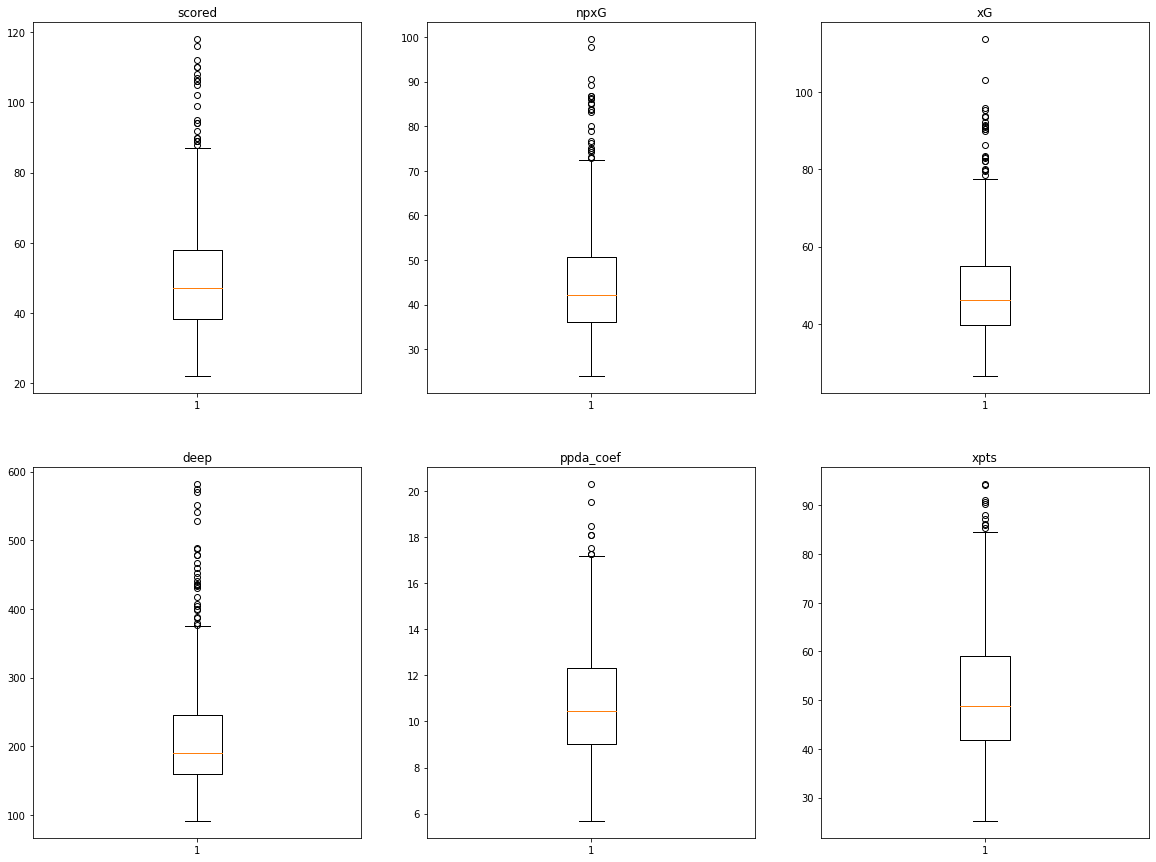

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

import matplotlib.pyplot as pyplot
from scipy import stats
import numpy
from IPython.display import HTML, display

numpy.warnings.filterwarnings('ignore')

numerical = data._get_numeric_data()
z = numpy.abs(stats.zscore(numerical))

threshold = 3
outliers = numpy.where(z > threshold)
print("Outliers arrays: ")
print(outliers)


displayData = [(row, numerical.columns[col], numerical[numerical.columns[col]].at[row]) 
               for row, col in zip(outliers[0], outliers[1])]




display(HTML(
   '<table><tr><th>Row</th><th>Col</th><th>Value</th></tr>%s</table>' % 
    "".join('<tr><td>%d</td><td>%s</td><td>%s</td></tr>' % 
            (elem[0], elem[1], elem[2]) for elem in displayData)))


IQRData = data[['scored', 'npxG' ,'xG','deep','ppda_coef', 'xpts']];
plotsInRow = 3
colCount = len(data._get_numeric_data().columns)
fig , axs = pyplot.subplots(int(colCount / plotsInRow), plotsInRow)

col = 0

for colName, idx in zip(IQRData._get_numeric_data().columns, range(0, colCount)):
    
    axis = pyplot.subplot(int("%d%d%d" % (2, plotsInRow, idx + 1)))
    axis.set_title(colName)
    axis.boxplot(IQRData[colName])
    col+=1
    if(col == plotsInRow):
        col = 0


###8.Чи є у вас колонки з непраивльними / пропущеними  значеннями ? Якщо так , тоді опрацюйте їх в [залежності від умови і типу даних](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

In [ ]:
Немає.

Discover outliers with visualization tools
Box plot
Scatter plot

Z-Score
IQR score